In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# to remove error or depreciation warnings on server
import warnings
warnings.filterwarnings("ignore", category= DeprecationWarning)

In [2]:
%matplotlib inline

In [3]:
# to import the dataset
df = pd.read_csv('C:/Users/miche/Desktop/machine_learning/asthma_disease_data.csv')

In [4]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid


In [6]:
# to check for missing values 
df.isnull().sum()

PatientID                 0
Age                       0
Gender                    0
Ethnicity                 0
EducationLevel            0
BMI                       0
Smoking                   0
PhysicalActivity          0
DietQuality               0
SleepQuality              0
PollutionExposure         0
PollenExposure            0
DustExposure              0
PetAllergy                0
FamilyHistoryAsthma       0
HistoryOfAllergies        0
Eczema                    0
HayFever                  0
GastroesophagealReflux    0
LungFunctionFEV1          0
LungFunctionFVC           0
Wheezing                  0
ShortnessOfBreath         0
ChestTightness            0
Coughing                  0
NighttimeSymptoms         0
ExerciseInduced           0
Diagnosis                 0
DoctorInCharge            0
dtype: int64

In [7]:
# to check for any duplicated values
duplicates = df[df.duplicated()]

In [8]:
# there are no duplicated values
duplicates

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge


In [9]:
# to check if data are in their correct data types, all variables are integers
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               2392 non-null   int64  
 1   Age                     2392 non-null   int64  
 2   Gender                  2392 non-null   int64  
 3   Ethnicity               2392 non-null   int64  
 4   EducationLevel          2392 non-null   int64  
 5   BMI                     2392 non-null   float64
 6   Smoking                 2392 non-null   int64  
 7   PhysicalActivity        2392 non-null   float64
 8   DietQuality             2392 non-null   float64
 9   SleepQuality            2392 non-null   float64
 10  PollutionExposure       2392 non-null   float64
 11  PollenExposure          2392 non-null   float64
 12  DustExposure            2392 non-null   float64
 13  PetAllergy              2392 non-null   int64  
 14  FamilyHistoryAsthma     2392 non-null   

In [10]:
# to convert target variable 'Diagnosis' into a categorical variable using map
df['Diagnosis'].unique()

array([0, 1], dtype=int64)

In [11]:
df['Diagnosis'] = df['Diagnosis'].map({0:'No', 1:'Yes'})

In [12]:
df['Diagnosis'].unique()

array(['No', 'Yes'], dtype=object)

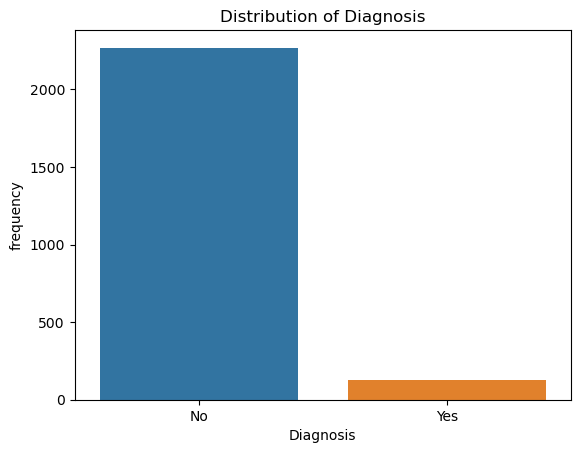

In [13]:
# to visualise the distribution of target variable
sns.countplot(data=df, x='Diagnosis')
plt.title('Distribution of Diagnosis')
plt.ylabel('frequency');

In [14]:
df['Diagnosis'].value_counts()

Diagnosis
No     2268
Yes     124
Name: count, dtype: int64

In [15]:
# 5% of the sample population is diagnosed with Asthma
100 *(df['Diagnosis'].value_counts()/len(df))

Diagnosis
No     94.816054
Yes     5.183946
Name: count, dtype: float64

In [16]:
df['EducationLevel'].unique()

array([0, 2, 1, 3], dtype=int64)

In [17]:
df['EducationLevel'] = df['EducationLevel'].map({0:'None', 1:'High_School', 2:'Bachelors', 3:'Higher_edu'})

In [18]:
df['EducationLevel'].unique()

array(['None', 'Bachelors', 'High_School', 'Higher_edu'], dtype=object)

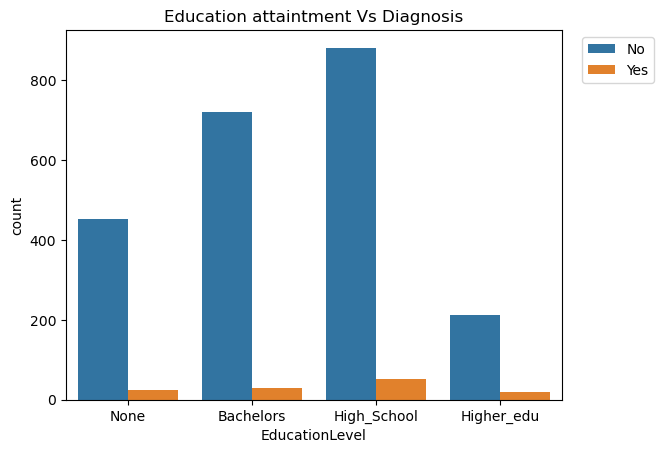

In [20]:
# people in with high school education are more likely to get asthma
sns.countplot(data=df, x= 'EducationLevel', hue='Diagnosis')
plt.legend(bbox_to_anchor=(1.2,1.0))
plt.title('Education attaintment Vs Diagnosis');

In [21]:
df['Gender'].unique()

array([0, 1], dtype=int64)

In [22]:
df['Gender'] = df['Gender'].map({0:'Male', 1:'Female'})

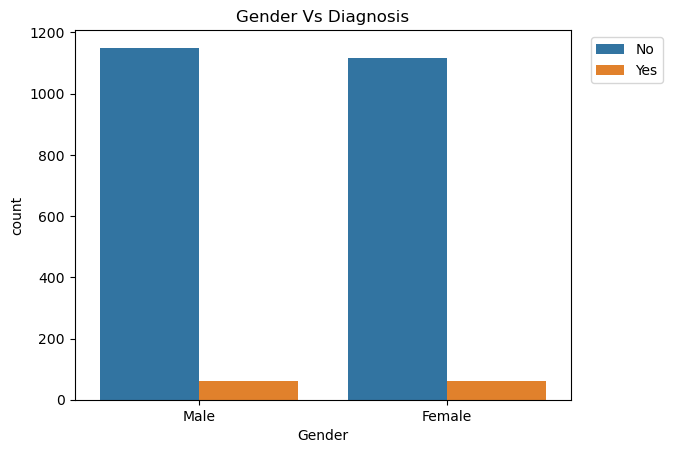

In [28]:
# Both male and females are likely to suffer attacks
sns.countplot(data=df, x='Gender', hue ='Diagnosis')
plt.title('Gender Vs Diagnosis')
plt.legend(bbox_to_anchor=(1.2,1.0));

In [26]:
pd.DataFrame(df.groupby(['Gender','Diagnosis'])['Diagnosis'].count())

Diagnosis
Gender Diagnosis           
Female No              1118
       Yes               62
Male   No              1150
       Yes               62

In [29]:
df['Ethnicity'].unique()

array([1, 2, 0, 3], dtype=int64)

In [30]:
df['Ethnicity'] = df['Ethnicity'].map({0:'Caucasian', 1:'African American', 2:'Asian', 3:'Other'})

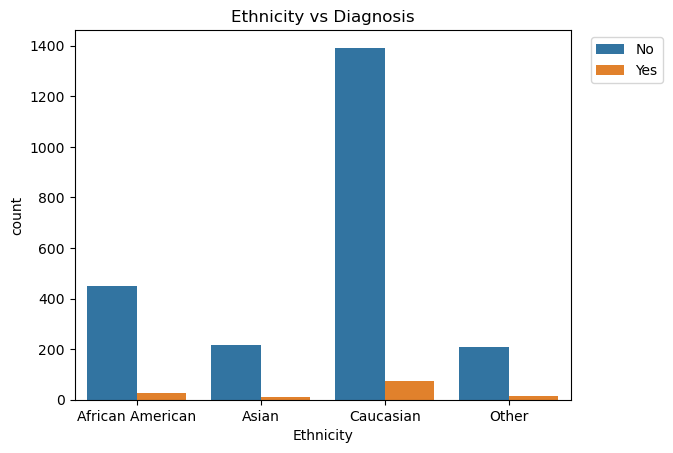

In [32]:
# Caucasians are more likely to suffer from Asthma attacks
sns.countplot(data=df, x='Ethnicity', hue='Diagnosis')
plt.legend(bbox_to_anchor=(1.2,1.0))
plt.title('Ethnicity vs Diagnosis');

In [33]:
# to remove unimportant variables not useful for analysis
df = df.drop(['PatientID','DoctorInCharge'], axis=1)

In [34]:
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
0,63,Male,African American,None,15.848744,0,0.894448,5.488696,8.701003,7.388481,...,0,1.369051,4.941206,0,0,1,0,0,1,No
1,26,Female,Asian,Bachelors,22.757042,0,5.897329,6.341014,5.153966,1.969838,...,0,2.197767,1.702393,1,0,0,1,1,1,No
2,57,Male,Asian,High_School,18.395396,0,6.739367,9.196237,6.840647,1.460593,...,0,1.698011,5.022553,1,1,1,0,1,1,No
3,40,Female,Asian,High_School,38.515278,0,1.404503,5.826532,4.253036,0.581905,...,0,3.032037,2.300159,1,0,1,1,1,0,No
4,61,Male,Caucasian,Higher_edu,19.283802,0,4.604493,3.127048,9.625799,0.980875,...,0,3.470589,3.067944,1,1,1,0,0,1,No


In [35]:
df.columns

Index(['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'PhysicalActivity', 'DietQuality', 'SleepQuality', 'PollutionExposure',
       'PollenExposure', 'DustExposure', 'PetAllergy', 'FamilyHistoryAsthma',
       'HistoryOfAllergies', 'Eczema', 'HayFever', 'GastroesophagealReflux',
       'LungFunctionFEV1', 'LungFunctionFVC', 'Wheezing', 'ShortnessOfBreath',
       'ChestTightness', 'Coughing', 'NighttimeSymptoms', 'ExerciseInduced',
       'Diagnosis'],
      dtype='object')

In [36]:
pd.get_dummies(df[['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'PhysicalActivity', 'DietQuality', 'SleepQuality', 'PollutionExposure',
       'PollenExposure', 'DustExposure', 'PetAllergy', 'FamilyHistoryAsthma',
       'HistoryOfAllergies', 'Eczema', 'HayFever', 'GastroesophagealReflux',
       'LungFunctionFEV1', 'LungFunctionFVC', 'Wheezing', 'ShortnessOfBreath',
       'ChestTightness', 'Coughing', 'NighttimeSymptoms', 'ExerciseInduced',
       'Diagnosis']]).corr()

,Age,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,PollenExposure,DustExposure,PetAllergy,...,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian,Ethnicity_Other,EducationLevel_Bachelors,EducationLevel_High_School,EducationLevel_Higher_edu,EducationLevel_None,Diagnosis_No,Diagnosis_Yes
Age,1.000000,0.016184,-0.009309,0.000053,0.004262,0.002718,-0.042311,-0.006753,0.013848,-0.034995,...,0.008318,0.007459,-0.019548,0.013794,-0.016914,0.033736,-0.007651,-0.015872,0.015111,-0.015111
BMI,0.016184,1.000000,0.004890,-0.012046,-0.014996,-0.012891,-0.028962,-0.012746,0.064841,0.003994,...,0.009053,0.022090,-0.018797,-0.003278,0.011293,-0.013745,0.000306,0.003442,0.012522,-0.012522
Smoking,-0.009309,0.004890,1.000000,0.013838,-0.027010,-0.012348,0.011038,-0.002237,-0.010173,0.018481,...,0.014068,0.006297,-0.003994,-0.018981,-0.018481,0.006815,0.028840,-0.008224,0.019321,-0.019321
PhysicalActivity,0.000053,-0.012046,0.013838,1.000000,0.049487,0.007208,-0.029539,0.006504,-0.011742,-0.011780,...,0.014568,0.032441,-0.039178,0.012830,-0.007131,0.053310,-0.037395,-0.029081,-0.005066,0.005066
DietQuality,0.004262,-0.014996,-0.027010,0.049487,1.000000,0.014355,0.006955,0.017552,-0.027905,-0.053914,...,-0.010265,0.010157,-0.002534,0.008052,0.001585,-0.022760,-0.026637,0.045638,0.003149,-0.003149
SleepQuality,0.002718,-0.012891,-0.012348,0.007208,0.014355,1.000000,-0.029374,-0.040430,-0.031544,-0.035942,...,-0.035195,0.011885,0.023658,-0.003379,-0.033717,0.016966,0.043762,-0.013978,-0.018022,0.018022
PollutionExposure,-0.042311,-0.028962,0.011038,-0.029539,0.006955,-0.029374,1.000000,0.011658,-0.008230,0.018802,...,-0.000457,-0.037132,0.033193,-0.017417,0.020502,-0.015014,0.013970,-0.015803,0.004535,-0.004535
PollenExposure,-0.006753,-0.012746,-0.002237,0.006504,0.017552,-0.040430,0.011658,1.000000,-0.002338,0.004886,...,-0.019476,-0.040458,0.041965,-0.002652,0.020535,0.016469,-0.027279,-0.023716,-0.015099,0.015099
DustExposure,0.013848,0.064841,-0.010173,-0.011742,-0.027905,-0.031544,-0.008230,-0.002338,1.000000,0.011337,...,0.018636,-0.003800,-0.031908,0.031741,-0.026628,0.009917,-0.006246,0.023408,0.025972,-0.025972
PetAllergy,-0.034995,0.003994,0.018481,-0.011780,-0.053914,-0.035942,0.018802,0.004886,0.011337,1.000000,...,0.031446,-0.019122,-0.028013,0.023144,-0.005600,-0.015780,0.055035,-0.014988,0.013078,-0.013078


In [37]:
corr_df = pd.get_dummies(df[['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'PhysicalActivity', 'DietQuality', 'SleepQuality', 'PollutionExposure',
       'PollenExposure', 'DustExposure', 'PetAllergy', 'FamilyHistoryAsthma',
       'HistoryOfAllergies', 'Eczema', 'HayFever', 'GastroesophagealReflux',
       'LungFunctionFEV1', 'LungFunctionFVC', 'Wheezing', 'ShortnessOfBreath',
       'ChestTightness', 'Coughing', 'NighttimeSymptoms', 'ExerciseInduced',
       'Diagnosis']]).corr()

In [38]:
# to sort correlation values in ascending order
corr_df['Diagnosis_Yes'].sort_values()

Diagnosis_No                 -1.000000
EducationLevel_Bachelors     -0.039960
ChestTightness               -0.039278
DustExposure                 -0.025972
Coughing                     -0.024193
NighttimeSymptoms            -0.021965
Smoking                      -0.019321
HayFever                     -0.019141
ShortnessOfBreath            -0.015281
Age                          -0.015111
PetAllergy                   -0.013078
BMI                          -0.012522
Ethnicity_Caucasian          -0.011398
Eczema                       -0.008592
Ethnicity_Asian              -0.005584
PollutionExposure            -0.004535
DietQuality                  -0.003149
Gender_Male                  -0.003128
HistoryOfAllergies           -0.001951
FamilyHistoryAsthma          -0.001334
EducationLevel_None           0.001041
Ethnicity_African American    0.001778
Gender_Female                 0.003128
PhysicalActivity              0.005066
EducationLevel_High_School    0.010182
PollenExposure           

In [39]:
# to remove all categorial from Diagnosis
corr_df['Diagnosis_Yes'].sort_values().iloc[1:-1]

EducationLevel_Bachelors     -0.039960
ChestTightness               -0.039278
DustExposure                 -0.025972
Coughing                     -0.024193
NighttimeSymptoms            -0.021965
Smoking                      -0.019321
HayFever                     -0.019141
ShortnessOfBreath            -0.015281
Age                          -0.015111
PetAllergy                   -0.013078
BMI                          -0.012522
Ethnicity_Caucasian          -0.011398
Eczema                       -0.008592
Ethnicity_Asian              -0.005584
PollutionExposure            -0.004535
DietQuality                  -0.003149
Gender_Male                  -0.003128
HistoryOfAllergies           -0.001951
FamilyHistoryAsthma          -0.001334
EducationLevel_None           0.001041
Ethnicity_African American    0.001778
Gender_Female                 0.003128
PhysicalActivity              0.005066
EducationLevel_High_School    0.010182
PollenExposure                0.015099
SleepQuality             

In [40]:
corr_yes_diagnosis = corr_df['Diagnosis_Yes'].sort_values().iloc[1:-1]

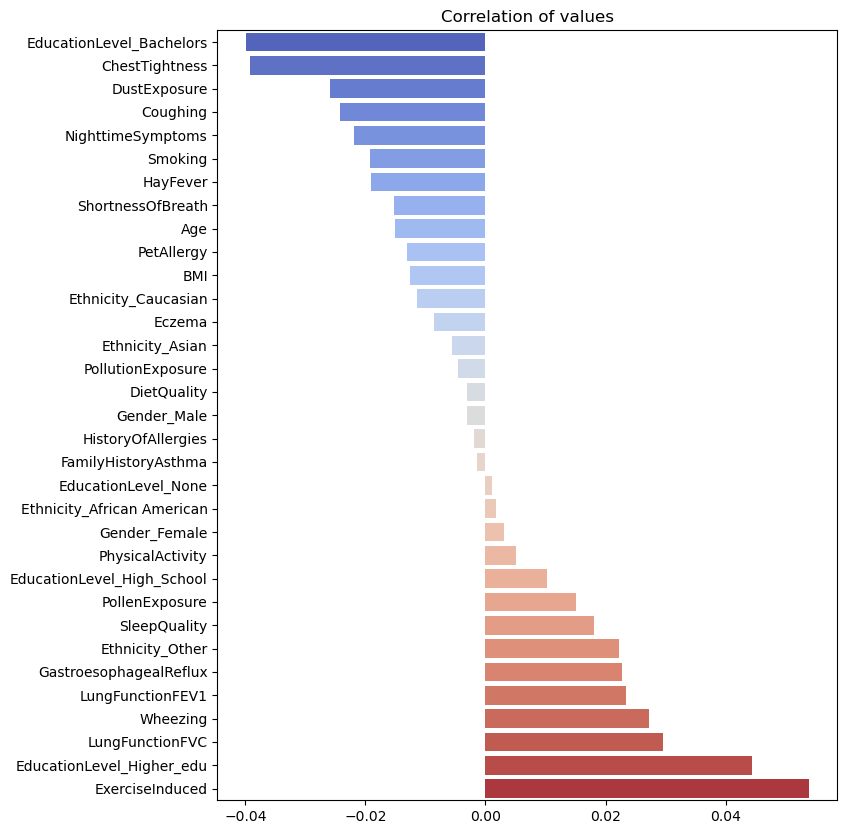

In [41]:
# to visualise predictors in a barplot
plt.figure(figsize=(8,10), dpi=100)
sns.barplot(y = corr_yes_diagnosis.index, x = corr_yes_diagnosis.values, palette = 'coolwarm')
plt.title('Correlation of values');

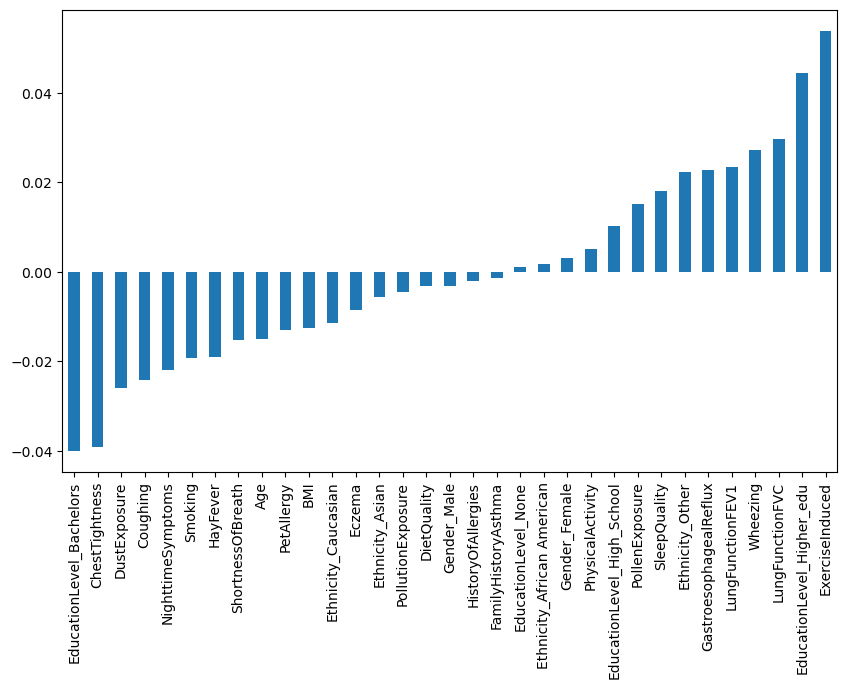

In [42]:
# Alternative way to plot
plt.figure(figsize=(10, 6), dpi=100)
corr_df['Diagnosis_Yes'].sort_values().iloc[1:-1].plot(kind='bar');

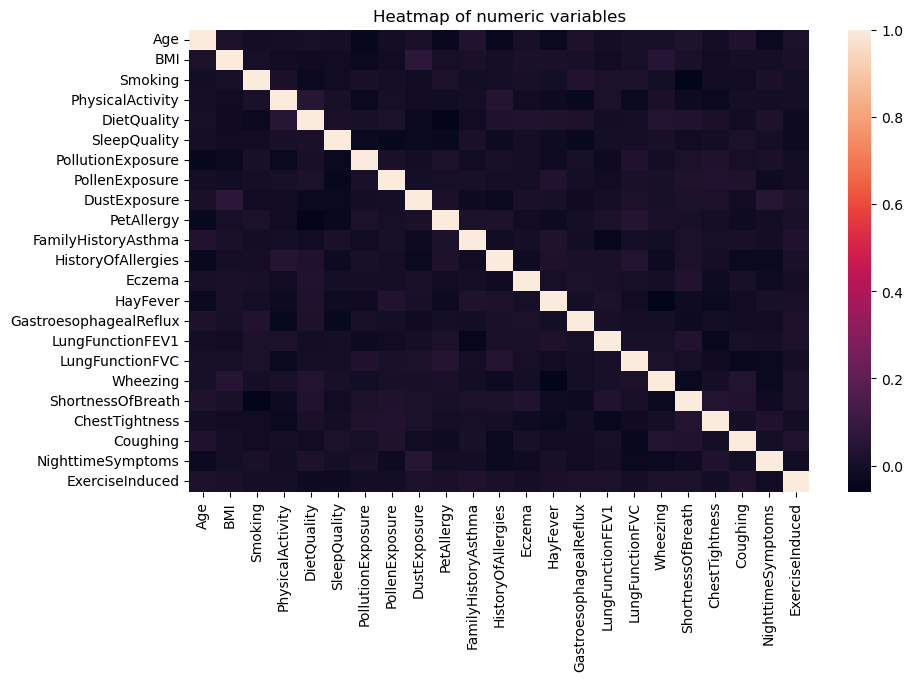

In [43]:
# to visualise correlation of all numeric values in a heatmap
plt.figure(figsize=(10,6), dpi=100)
sns.heatmap(data= df.select_dtypes(['int','float']).corr())
plt.title('Heatmap of numeric variables');

In [44]:
## predictive modelling: machine learning algorithm
X = df.drop('Diagnosis', axis=1)

In [45]:
# to convert categorical variable into dummy variable, drop_first = True to remove multi-collinearity
X = pd.get_dummies(X, drop_first = True)

In [46]:
y = df['Diagnosis']

In [47]:
from sklearn.model_selection import train_test_split

In [51]:
# to make the dataset into equivalent scale
from sklearn.preprocessing import StandardScaler

In [48]:
# to assign 20% as testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 101)

In [52]:
# to scale the dataset
scaler = StandardScaler()

In [53]:
scaled_X_train = scaler.fit_transform(X_train)

In [54]:
# to transform on the X testing data
scaled_X_test = scaler.transform(X_test)

In [55]:
# to do oversampling via SMOTE as target variable is imbalanced
from imblearn.over_sampling import SMOTE

In [56]:
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions y_train dataset:  (1913,)
Number transactions y_test dataset:  (479,)


In [57]:
# to Oversample Diagnosis as it is imbalanced
print("Before OverSampling, counts of label 'Yes': {}".format(sum(y_train=="Yes")))
print("Before OverSampling, counts of label 'No': {}\n".format(sum(y_train=="No")))

sm = SMOTE()
X_train_res, y_train_res = sm.fit_resample(scaled_X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {}\n'.format(y_train_res.shape))

print("After OverSampling, counts of label 'Yes': {}".format(sum(y_train_res=="Yes")))
print("After OverSampling, counts of label 'No': {}" .format(sum(y_train_res=="No")))

Before OverSampling, counts of label 'Yes': 97
Before OverSampling, counts of label 'No': 1816

After OverSampling, the shape of train_X: (3632, 30)
After OverSampling, the shape of train_y: (3632,)

After OverSampling, counts of label 'Yes': 1816
After OverSampling, counts of label 'No': 1816


In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [60]:
dt = DecisionTreeClassifier()

In [61]:
dt.fit(X_train_res, y_train_res)

DecisionTreeClassifier()

In [62]:
# to predict on the X testing set
dt_pred = dt.predict(scaled_X_test)

In [63]:
# to print first 10 prediction from Decision tree classifier model
dt_pred[:10]

array(['No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No'],
      dtype=object)

In [64]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [65]:
print(confusion_matrix(y_test,dt_pred))
print('\n')
print(classification_report(y_test,dt_pred)) # Accuracy rate for Decision tree classifer = 85%

[[404  48]
 [ 24   3]]


              precision    recall  f1-score   support

          No       0.94      0.89      0.92       452
         Yes       0.06      0.11      0.08        27

    accuracy                           0.85       479
   macro avg       0.50      0.50      0.50       479
weighted avg       0.89      0.85      0.87       479



In [66]:
rf = RandomForestClassifier()

In [67]:
# to fit the Random Forest classifier onto the training data
rf.fit(X_train_res, y_train_res)

RandomForestClassifier()

In [68]:
# to predict on the scaled X data
rf_pred = rf.predict(scaled_X_test)

In [69]:
# to print the first 10 prediction from the random forest model
rf_pred[:10]

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No'],
      dtype=object)

In [75]:
print(confusion_matrix(y_test, rf_pred))
print('\n')
print(classification_report(y_test, rf_pred)) # Accuracy rate of the Random Forest classifier model = 94%

[[452   0]
 [ 27   0]]


              precision    recall  f1-score   support

          No       0.94      1.00      0.97       452
         Yes       0.00      0.00      0.00        27

    accuracy                           0.94       479
   macro avg       0.47      0.50      0.49       479
weighted avg       0.89      0.94      0.92       479



C:\Users\miche\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\miche\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\miche\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
# to build the Adaboost classifier model
ada = AdaBoostClassifier()

In [77]:
ada.fit(X_train_res,y_train_res)

AdaBoostClassifier()

In [78]:
ada_pred = ada.predict(scaled_X_test)

In [79]:
print(confusion_matrix(y_test, ada_pred))
print('\n')
print(classification_report(y_test, ada_pred)) # Adaboost classifier model achieved 90% accuracy rate

[[429  23]
 [ 26   1]]


              precision    recall  f1-score   support

          No       0.94      0.95      0.95       452
         Yes       0.04      0.04      0.04        27

    accuracy                           0.90       479
   macro avg       0.49      0.49      0.49       479
weighted avg       0.89      0.90      0.89       479



In [80]:
# to build the Gradient Boost classifier model
gb = GradientBoostingClassifier()

In [81]:
# to fit the gradient boost model onto the training data
gb.fit(X_train_res, y_train_res)

GradientBoostingClassifier()

In [82]:
# to predict on the X test set
gb_pred = gb.predict(scaled_X_test)

In [83]:
print(confusion_matrix(y_test, gb_pred))
print('\n')
print(classification_report(y_test, gb_pred)) # Gradient boost classifier achieved accuracy rate = 94%

[[451   1]
 [ 27   0]]


              precision    recall  f1-score   support

          No       0.94      1.00      0.97       452
         Yes       0.00      0.00      0.00        27

    accuracy                           0.94       479
   macro avg       0.47      0.50      0.48       479
weighted avg       0.89      0.94      0.92       479



In [84]:
# the Gradient Boost classifier achieved a higher accuracy than the RF model, therefore it is selected
gb.feature_importances_

array([0.007614  , 0.01355335, 0.01458673, 0.00968885, 0.02784678,
       0.00364095, 0.00546709, 0.02022445, 0.0140642 , 0.03413473,
       0.06131919, 0.013074  , 0.04462031, 0.02117072, 0.0154659 ,
       0.0138931 , 0.01062965, 0.06811613, 0.07557398, 0.17014534,
       0.04385224, 0.04155459, 0.14039121, 0.05018212, 0.00029417,
       0.01316504, 0.00273988, 0.03960669, 0.01265632, 0.01072829])

In [85]:
# to print name of variables
X.columns

Index(['Age', 'BMI', 'Smoking', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'PollutionExposure', 'PollenExposure', 'DustExposure',
       'PetAllergy', 'FamilyHistoryAsthma', 'HistoryOfAllergies', 'Eczema',
       'HayFever', 'GastroesophagealReflux', 'LungFunctionFEV1',
       'LungFunctionFVC', 'Wheezing', 'ShortnessOfBreath', 'ChestTightness',
       'Coughing', 'NighttimeSymptoms', 'ExerciseInduced', 'Gender_Male',
       'Ethnicity_Asian', 'Ethnicity_Caucasian', 'Ethnicity_Other',
       'EducationLevel_High_School', 'EducationLevel_Higher_edu',
       'EducationLevel_None'],
      dtype='object')

In [86]:
pd.DataFrame(data = gb.feature_importances_, index = X.columns, columns= ['Importance'])

,Importance
Age,0.007614
BMI,0.013553
Smoking,0.014587
PhysicalActivity,0.009689
DietQuality,0.027847
SleepQuality,0.003641
PollutionExposure,0.005467
PollenExposure,0.020224
DustExposure,0.014064
PetAllergy,0.034135


In [87]:
gb_importance = pd.DataFrame(data = gb.feature_importances_, index = X.columns, columns= ['Importance'])

In [88]:
gb_impt = gb_importance.sort_values('Importance', ascending=False)

In [90]:
gb_impt

,Importance
ChestTightness,0.170145
ExerciseInduced,0.140391
ShortnessOfBreath,0.075574
Wheezing,0.068116
FamilyHistoryAsthma,0.061319
Gender_Male,0.050182
Eczema,0.044620
Coughing,0.043852
NighttimeSymptoms,0.041555
EducationLevel_High_School,0.039607


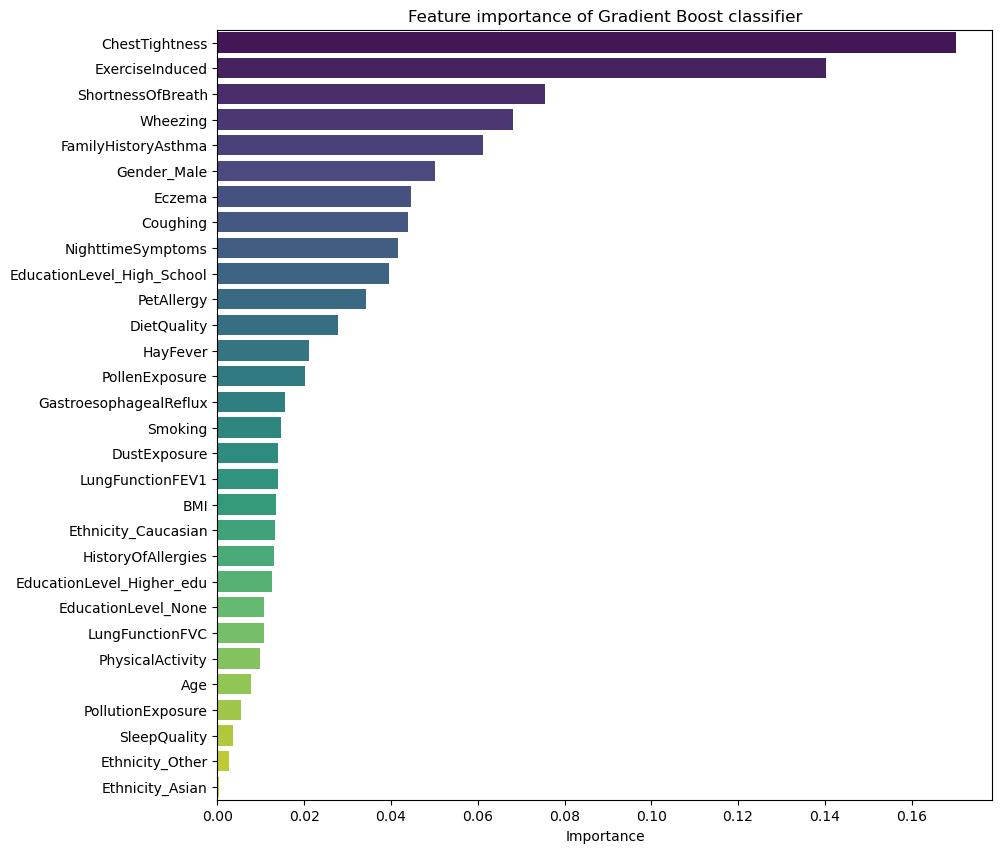

In [91]:
# to visualise Random Forest classifier predictors on a barplot
# Predictors of asthma attack: 1) Chest_tightness, 2) Exercise_Induced, 3) Shortness_of_Breath)
plt.figure(figsize=(10,10), dpi=100)
sns.barplot(data = gb_impt, x='Importance', y= gb_impt.index, palette='viridis')
plt.title('Feature importance of Gradient Boost classifier', fontsize=12);